In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [2]:
def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg

In [3]:
gr1 = pd.read_csv('gr1.csv')
s33 = pd.read_csv('s33.csv')


shift = 1.8

norm_peak_min = 610
norm_peak_max = 620



In [4]:
def bkg_norm(data):
    minValue = min(data['I'])
    return (data['I']-minValue)/(gr1['I'][findarg(gr1['W'], norm_peak_min)+np.argmax(gr1['I'][findarg(gr1['W'], norm_peak_min):findarg(gr1['W'], norm_peak_max)])] - minValue)

(0.0, 9.0)

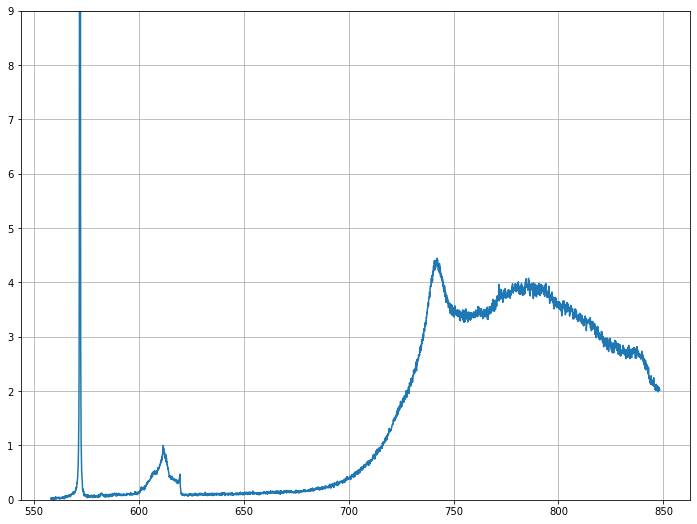

In [5]:
plt.figure(figsize=(12,9))
plt.grid()
y1 = bkg_norm(gr1)

y1[findarg(gr1['W'],624.4)]= y1[findarg(gr1['W'],624.2)]
x1 = gr1['W']- shift
plt.plot(x1,y1)
plt.ylim([0,9])


(0.0, 9.0)

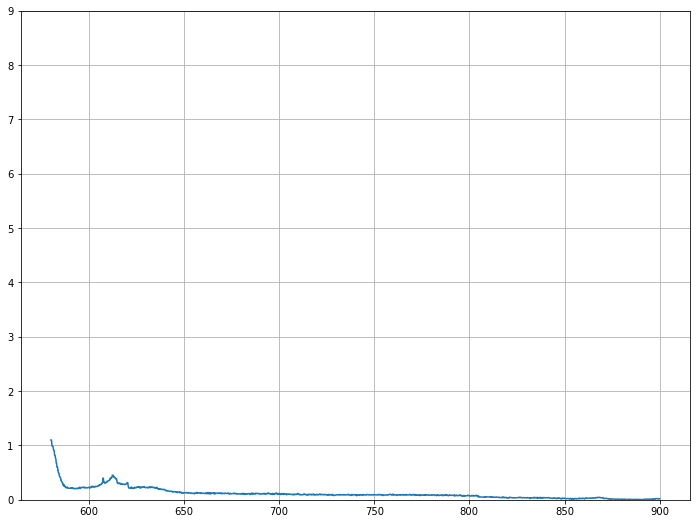

In [6]:
plt.figure(figsize=(12,9))
plt.grid()
y2 = bkg_norm(s33)
x2 = s33['W']
plt.plot(x2,y2)
plt.ylim([0,9])

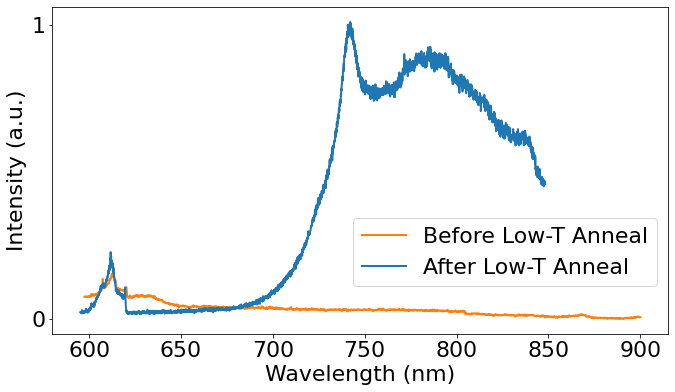

In [7]:

cm = 1/2.54 
fig = plt.figure(figsize=(25*cm, 15*cm))
plt.rcParams.update({'font.size': 22})
# plt.grid()
plt.plot(x2[200:],y2[200:]*1.5, linewidth=2,  label = 'Before Low-T Anneal', color = 'C1')
plt.plot(x1[420:],y1[420:],linewidth=2, label = 'After Low-T Anneal', color = 'C0')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
# plt.ylim([0,9])
plt.yticks([])
plt.yticks([0,4.4],[0,1])
plt.legend(loc = 'center right',bbox_to_anchor=(1, 0.25))
plt.tight_layout()
plt.savefig('SpecChange.pdf', format= 'pdf',transparent=True)



In [8]:
x1[420]

595.1540125

In [9]:
x2[200]

597.4677653915556